Preparing the DATA

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\syed usama ilyas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df =pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


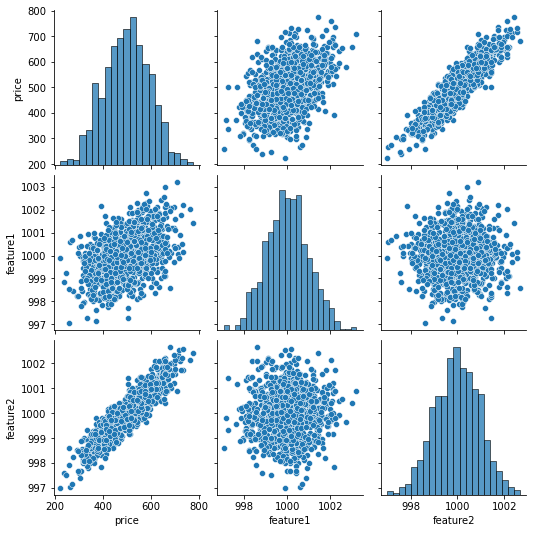

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [17]:
X_train.max()

1.0

In [18]:
X_train.min()

0.0

Create the model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
help(Sequential) #description of Sequential

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build 

In [23]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

In [24]:
model = Sequential([Dense(4,activation='relu'),  #layer 1 units(neurons = 4)
                   Dense(2,activation='relu'),   #activation function==rectified linear unit
                   Dense(1)])                    #outputlayer

In [25]:
#another way of defining a model
model = Sequential()

In [27]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))  #output layer

In [28]:
model.compile(optimizer='rmsprop',loss='mse')

In [29]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 261300.5000
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255592.2500
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257465.4062
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255904.0312
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254724.4219
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256068.1719
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250050.4531
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 253642.6719
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 256666.8594
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255220.7188
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255830.0469
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250874.5625
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 253761.1875
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 245638.7500
E

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.6572
Epoch 80/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.2659
Epoch 81/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.3976
Epoch 82/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 64.6873
Epoch 83/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.4981
Epoch 84/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.2049
Epoch 85/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.7751
Epoch 86/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.6819
Epoch 87/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.5439
Epoch 88/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.1492
Epoch 89/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.6444
Epoch 90/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.8773
Epoch 91/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.9629
Epoch 92/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.8763
Epoch 93/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.3757
Epoch 159/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.2093
Epoch 160/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.2497
Epoch 161/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.4520
Epoch 162/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.6433
Epoch 163/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.0481
Epoch 164/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.2624
Epoch 165/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.5796
Epoch 166/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.9859
Epoch 167/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.2016
Epoch 168/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.0143
Epoch 169/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.9552
Epoch 170/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.0905
Epoch 171/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.2785
Epoch 172/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.8226
Epoch 238/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.5411
Epoch 239/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.7425
Epoch 240/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.6883
Epoch 241/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.2212
Epoch 242/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.1391
Epoch 243/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.0719
Epoch 244/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.0212
Epoch 245/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.1601
Epoch 246/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.0742
Epoch 247/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.1097
Epoch 248/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.1071
Epoch 249/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.5888
Epoch 250/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.7188


In [30]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

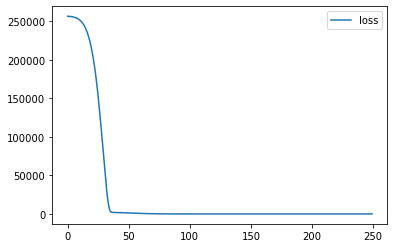

In [31]:
loss_df.plot()

#### Model Evaluation

In [32]:
model.evaluate(X_test,y_test,verbose=0)

28.286211013793945

In [33]:
model.evaluate(X_train,y_train,verbose=0)

25.6141300201416

In [34]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [35]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [36]:
test_predictions

0      406.661041
1      625.622314
2      594.109802
3      574.146973
4      367.872009
          ...    
295    530.824219
296    517.077942
297    611.687927
298    418.359619
299    412.269226
Length: 300, dtype: float32

In [37]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [38]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df

,Test True Y,0
0,402.296319,406.661041
1,624.156198,625.622314
2,582.455066,594.109802
3,578.588606,574.146973
4,371.224104,367.872009
...,...,...
295,525.704657,530.824219
296,502.909473,517.077942
297,612.727910,611.687927
298,417.569725,418.359619


In [41]:
pred_df.columns = ['Test True Y','Model Predictions']

In [42]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.661041
1,624.156198,625.622314
2,582.455066,594.109802
3,578.588606,574.146973
4,371.224104,367.872009
...,...,...
295,525.704657,530.824219
296,502.909473,517.077942
297,612.727910,611.687927
298,417.569725,418.359619


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

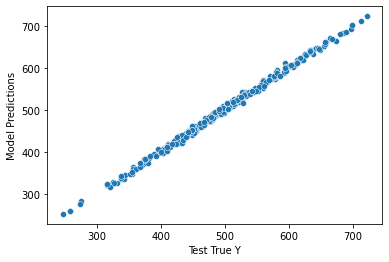

In [43]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data = pred_df)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.320722046466192

In [47]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [48]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

28.286213966299364

In [49]:
#Root mean Squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.318478538670563

In [50]:
#Training new set
new_gem  = [[998,1000]]#our own features
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [51]:
new_gem = scaler.transform(new_gem)

Saving the Model

In [60]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError


In [61]:
model.save('my_gem_model.h5')

In [62]:
later_model =model.save('my_gem_model.h5')

In [63]:
# If you're using 'mse' as the loss function
custom_objects = {'mse': MeanSquaredError()}

# Load the model, specifying the custom loss
later_model = load_model('my_gem_model.h5', custom_objects=custom_objects)

In [65]:
later_model.predict(new_gem)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[421.11435]], dtype=float32)